In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Reviews.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df['Score'].value_counts()

Score
5    363122
4     80655
1     52268
3     42640
2     29769
Name: count, dtype: int64

In [5]:
df.drop(columns = ['Id','ProductId','UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Time','Summary'],inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Score   568454 non-null  int64 
 1   Text    568454 non-null  object
dtypes: int64(1), object(1)
memory usage: 8.7+ MB


In [16]:
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

from imblearn.over_sampling import RandomOverSampler

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abdal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abdal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abdal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
df = df[df['Score']!= 3]
df['Sentiment'] = df['Score'].apply(lambda x: 1 if x > 3 else 0)

In [8]:
stop_words = set(stopwords.words('english')) - {"not", "no", "nor"}
lemmatizer = WordNetLemmatizer()

def text_preprocessing(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)

    tokens = word_tokenize(text)
    tokens_tmp = []
    for _ in tokens:
        if _ not in stop_words:
            tokens_tmp.append(lemmatizer.lemmatize(_))
    tokens = tokens_tmp
    return " ".join(tokens)

df['Reviews'] = df['Text'].apply(text_preprocessing)

In [9]:
df

,Score,Text,Sentiment,Reviews
0,5,I have bought several of the Vitality canned d...,1,bought several vitality canned dog food produc...
1,1,Product arrived labeled as Jumbo Salted Peanut...,0,product arrived labeled jumbo salted peanutsth...
2,4,This is a confection that has been around a fe...,1,confection around century light pillowy citrus...
3,2,If you are looking for the secret ingredient i...,0,looking secret ingredient robitussin believe f...
4,5,Great taffy at a great price. There was a wid...,1,great taffy great price wide assortment yummy ...
...,...,...,...,...
568449,5,Great for sesame chicken..this is a good if no...,1,great sesame chickenthis good not better restu...
568450,2,I'm disappointed with the flavor. The chocolat...,0,im disappointed flavor chocolate note especial...
568451,5,"These stars are small, so you can give 10-15 o...",1,star small give one training session tried tra...
568452,5,These are the BEST treats for training and rew...,1,best treat training rewarding dog good groomin...


In [10]:
x_train, x_test, y_train, y_test = train_test_split(df['Reviews'],df['Sentiment'],test_size=0.2,random_state=42,stratify=df['Sentiment'])

In [11]:
oversampler = RandomOverSampler(random_state=42)
x_train_res, y_train_res = oversampler.fit_resample(
    x_train.values.reshape(-1, 1),
    y_train
)

x_train_res = pd.Series(x_train_res.flatten())

In [12]:
vectorizer = TfidfVectorizer(max_features=20000)
x_train_vec = vectorizer.fit_transform(x_train_res)
x_test_vec = vectorizer.transform(x_test)

In [13]:
model = LogisticRegression(max_iter=1000,class_weight='balanced')
model.fit(x_train_vec,y_train_res)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [28]:
from sklearn.naive_bayes import MultinomialNB
model2 = MultinomialNB()
model2.fit(x_train_vec,y_train_res)

MultinomialNB()

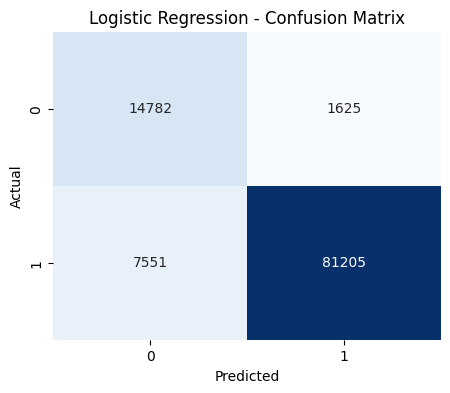

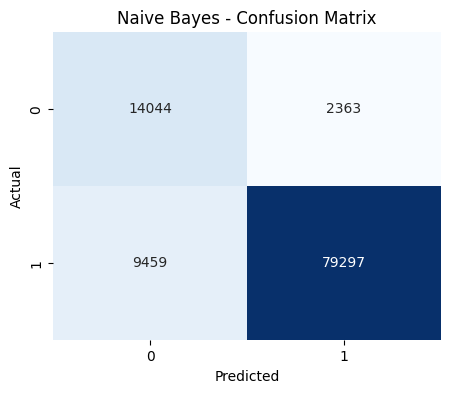

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, model.predict(x_test_vec), "Logistic Regression - Confusion Matrix")
plot_confusion_matrix(y_test, model2.predict(x_test_vec), "Naive Bayes - Confusion Matrix")

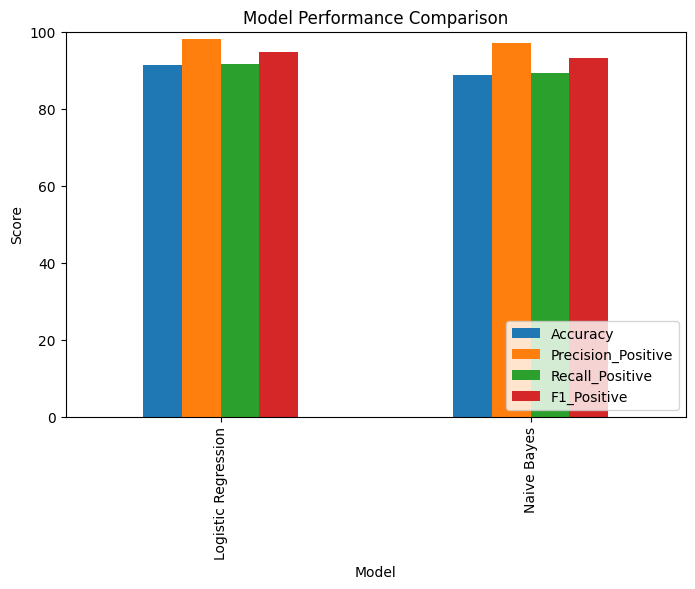

In [24]:
def compare_models(y_test, preds1, preds2, names):
    report1 = classification_report(y_test, preds1, output_dict=True)
    report2 = classification_report(y_test, preds2, output_dict=True)

    df2 = pd.DataFrame({
        "Model": [names[0], names[1]],
        "Accuracy": [report1["accuracy"]*100, report2["accuracy"]*100],
        "Precision_Positive": [report1["1"]["precision"]*100, report2["1"]["precision"]*100],
        "Recall_Positive": [report1["1"]["recall"]*100, report2["1"]["recall"]*100],
        "F1_Positive": [report1["1"]["f1-score"]*100, report2["1"]["f1-score"]*100]
    })

    df2.set_index("Model").plot(kind="bar", figsize=(8,5))
    plt.title("Model Performance Comparison")
    plt.ylabel("Score")
    plt.ylim(0,100)
    plt.legend(loc="lower right")
    plt.show()

compare_models(y_test,
               model.predict(x_test_vec),
               model2.predict(x_test_vec),
               ["Logistic Regression", "Naive Bayes"])


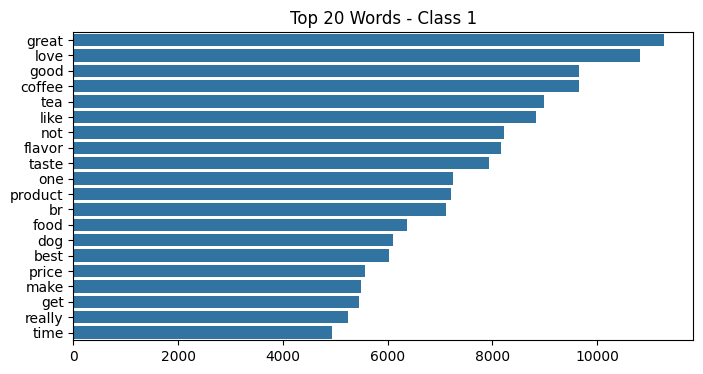

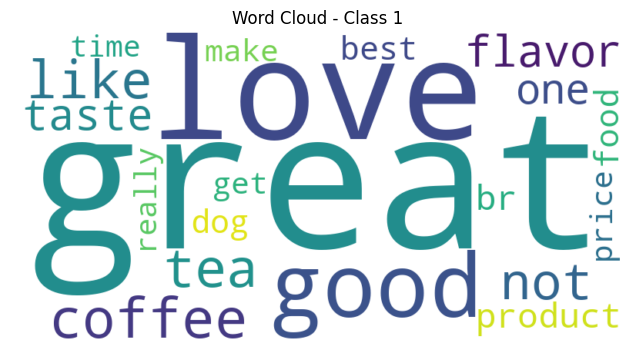

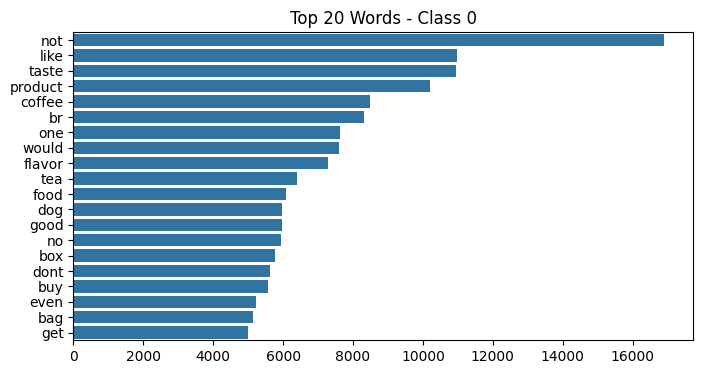

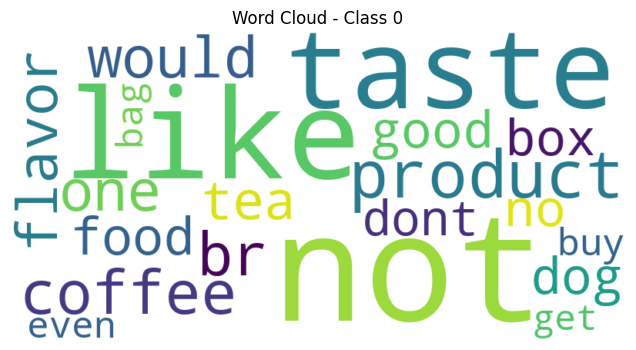

In [27]:
from wordcloud import WordCloud
def plot_top_words(class_label, vectorizer, x, y, top_n=20):
    class_docs = x[y==class_label]
    word_sum = class_docs.sum(axis=0)
    words_freq = [(word, word_sum[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    sorted_words = sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_n]

    words, freqs = zip(*sorted_words)
    plt.figure(figsize=(8,4))
    sns.barplot(x=list(freqs), y=list(words))
    plt.title(f"Top {top_n} Words - Class {class_label}")
    plt.show()

    wc = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(dict(sorted_words))
    plt.figure(figsize=(8,4))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud - Class {class_label}")
    plt.show()

plot_top_words(1, vectorizer, x_train_vec, y_train_res, top_n=20)  
plot_top_words(0, vectorizer, x_train_vec, y_train_res, top_n=20)  